# Machine learning
## Test de différents algorithmes de machine learning pour de la classification des espèces d'iris

Dans ce travail, nous aurons besoin d'une librairie R contenant des centaines d'algorithmes de machine learnig (ces algorithmes sont déjà codés, nous allons "juste" les utilser !). Cette librairie s'appelle "caret". Les deux premières librairies contiennent des outils de visualisation des données.

In [1]:
library("ggplot2") # graphiques classiques

In [2]:
library("psych") # pour la visualisation des données 


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [3]:
library("caret") # machine learning

Loading required package: lattice



Dans ce NoteBook, on va travailler avec des données de fleurs - des iris - déjà implémentées sous R. Ce jeu de données est très classique pour la découverte du machine learning et contient 150 observations de d'iris. Pour charger ce jeu de données, excécutez les commandes suivantes : 

In [4]:
data(iris)

Le jeu de données comprend 50 échantillons de chacune des trois espèces d'iris (Iris setosa, Iris virginica et Iris versicolor).  Quatre caractéristiques ont été mesurées à partir de chaque échantillon : la longueur et la largeur des sépales et des pétales, en centimètres. 

<img src="iris2.jpg" style="width:700px;height:300px"/>

Regardons ce jeu de données : 

In [5]:
iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


## 1) Explorons les données

Taille de notre jeu de données :

In [6]:
dim(iris)

[1] 150   5

### a) matrices de corrélation 

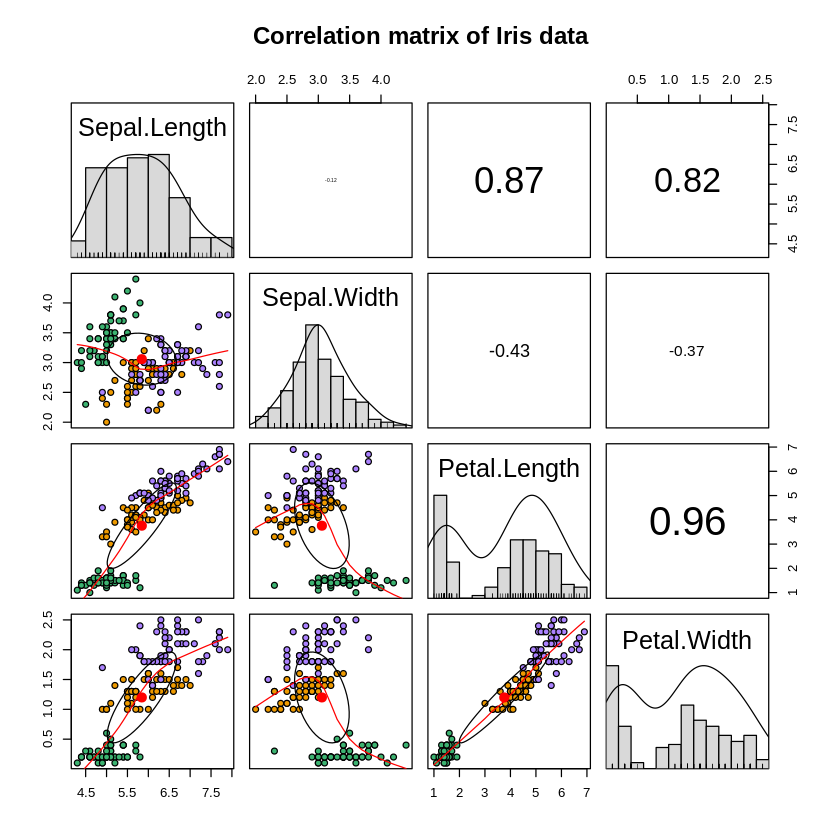

In [7]:
pairs.panels(
       iris[,1:4], # Our data.
       scale = TRUE, # Changes size of correlation value lables based on strength.
       hist.col = 'grey85', # Histogram color.  
       bg = c("mediumseagreen","orange2","mediumpurple1")[iris$Species], # Colors of the Species levels.
       pch = 21, # The plot characters shape and size.
       main = 'Correlation matrix of Iris data')  # Title. 

### b) Boxplot de la largeur des sépales (Sepal.Width)

In [ ]:
ggplot(
       # (1) Set data; (2) Specify X and Y variables; (3) 'fill' color separates our Species levels.
       data = iris, mapping = aes(x = Species, y = Sepal.Width, fill = Species)) +
       geom_boxplot() +  # Specifies that we want a box plot. 
       scale_fill_brewer(palette = 'Dark2') +  # Change color of box plots. 
       theme_light() +  # Set light theme. 
       labs(title = 'Box plot of sepal width for each species', 
            x = 'Species', y = 'Sepal width')  # Assign a title, axis names.

### c) Boxplot de la longueur des sépales (Sepal.Length)

In [ ]:
ggplot(data = iris, mapping = aes(x = Species, y = Sepal.Length, fill = Species)) +
       geom_boxplot() + 
       scale_fill_brewer(palette = 'Dark2') + 
       theme_light() +
       labs(title = 'Box plot of sepal length for each species', 
            x = 'Species', y = 'Sepal length')

### d) Boxplots pour les pétales

Créer deux boxplots : l'un pour la largeur des pétales et l'autre pour la longueur des pétales, en vous aidant du code ci-dessus.

### Largeur des pétales :

### Longueur des pétales :

## 2) Création du jeu de données "entrainement" et "test" 

Avant d'utiliser les algorithmes de machine learning, il va falloir séparer notre jeu de données en deux : l'un pour de l'entrainement (l'algorithme de machine learning va s'appuyer sur ce jeu de données pour apprendre à faire des prévisions sur nos données) et l'autre pour tester, c'est à dire évaluer si l'algorithme arrive à prévoir correctement. On peut faire des statistiques sur le jeu de test pour savoir si le modèle est correct ou pas !

On va créer un jeu d'entrainement à l'aide du paquet CARET qui va représenter 70% du jeu de données iris. Les données sont choisies aléatoirement.

In [8]:
train_index <- createDataPartition(y = iris$Species,  # y = our dependent variable.
                                   p = 0.7,  # Specifies split into 70% & 30%.
                                   list = FALSE,  # Sets results to matrix form. 
                                   times = 1)  # Sets number of partitions to create to 1. 

Jeu de données d'entrainement :

In [9]:
train_data <- iris[train_index,] 

Jeu de données de test : 

In [10]:
test_data <- iris[-train_index,]

Quelle est la dimension du jeu d'entrainement et de test ? 

In [11]:
dim(train_data)
dim(test_data)

[1] 105   5

[1] 45  5

Explorer les deux jeux de données :

## 3) Les différents algorithmes de machine learning

L'objectif du machine learning dans notre problème est de prévoir l'espèce d'iris en fonction des caractéristiques (longueur et largeur) des pétales et sépales.


Nous allons utiliser différents algorithmes classiques de machines learning :
- un méthode linéaire (LDA) 
- une méthode avec un arbre de décision (CART) 
- une méthode du plus proche voisin (kNN) 
- Support Vector Machine (SVM) 

Tous ces algrorithmes font parties des méthodes par apprentissage supervisé : le système est guidé dans son apprentissage en le nourissant d'exemples (par opposition aux méthodes non supervisés et par renforcement).

Deux grands types de méthodes existent pour mener à bien un apprentissage supervisé :
- la régression
- la classification

<img src="ml.PNG" style="width:600px;height:300px"/>

LDA est une méthode par régression alors que CART et kNN sont des méthodes de classification. SVM, quant à lui, mélange des régressions et des classifications.

La précsion du jeu d'entrainement est évaluée en machine learnig. C'est un premier indicateur nous permettant de savoir si le modèle obtenu par machine learning semble robuste ou pas.

In [12]:
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

## a) Méthode linéaire 

### Entrainement 

Création du modèle de prévision avec la méthode linéaire (LDA).

In [13]:
lda_model <- train(Species~., data=train_data, method="lda", metric=metric, trControl=control)

Evaluons la précision de notre modèle à l'aide d'une matrice de confusion :

In [14]:
confusionMatrix(lda_model)

Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
            Reference
Prediction   setosa versicolor virginica
  setosa       33.3        0.0       0.0
  versicolor    0.0       31.4       1.9
  virginica     0.0        1.9      31.4
                            
 Accuracy (average) : 0.9619


On peut aussi regarder l'importance de chaque variable dans le choix de la classification de l'espèce d'iris.

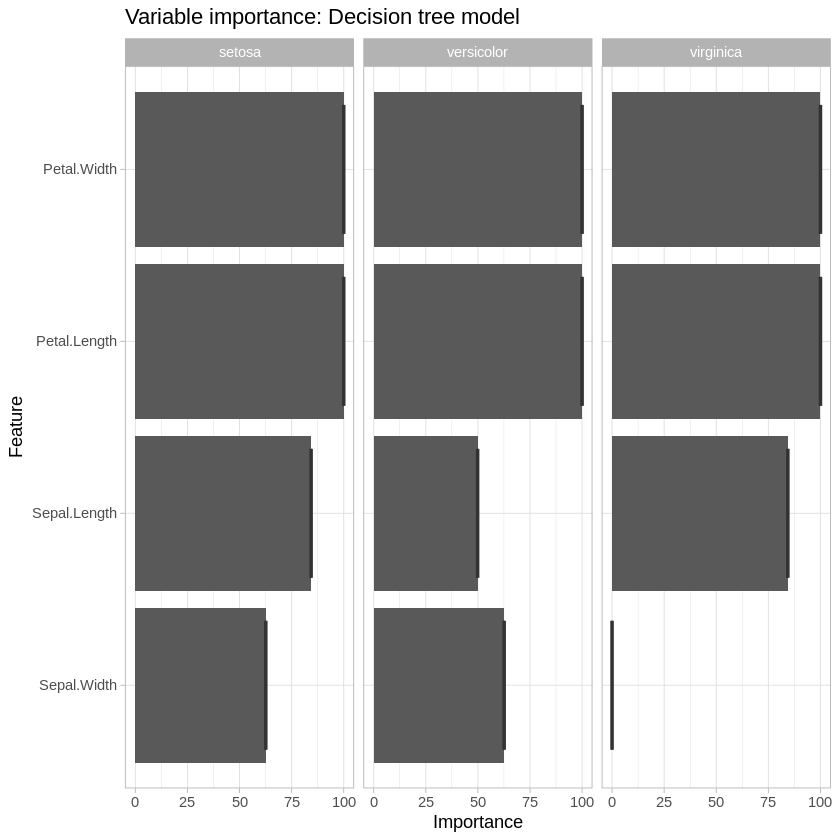

In [15]:
# Create object of importance of our variables 
dt_importance <- varImp(lda_model)

# Create plot of importance of variables
ggplot(data = dt_importance, mapping = aes(x = dt_importance[,1])) + # Data & mapping
  geom_boxplot() + # Create box plot
  labs(title = "Variable importance: Decision tree model") + # Title
  theme_light() # Theme

Quelles conclusions en tirez-vous ? 

### Prévision : utilisation du modèle sur le jeu de données test

In [16]:
prediction_lda <- predict(lda_model, test_data)

Regardons ce que nous obtenons :

In [17]:
prediction_lda

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  versicolor virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

Déterminons la proportion de prévisions justes à l'aide de matrices de confusion :

In [18]:
confusionMatrix(prediction_lda, test_data$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9667          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9333
Specificity                 1.0000            0.9667           1.0000
Pos Pred Value              1.0000            0.9375           1.0000
Neg Pred Value              1.0000            1.0000           0.9677
P

## b) Arbre de décision

### Entrainement 

Création du modèle de prévision à l'aide d'un arbre de décision (CART). Sous R, ce modèle se nomme "rpart".

In [19]:
cart_model <- train(Species~., data=train_data, method="rpart", metric=metric, trControl=control)

Evaluons la précision de notre modèle à l'aide d'une matrice de confusion :

In [20]:
confusionMatrix(cart_model)

Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
            Reference
Prediction   setosa versicolor virginica
  setosa       33.3        0.0       0.0
  versicolor    0.0       29.5       3.8
  virginica     0.0        3.8      29.5
                            
 Accuracy (average) : 0.9238


On peut aussi regarder l'importance de chaque variable dans le choix de la classification de l'espèce d'iris.

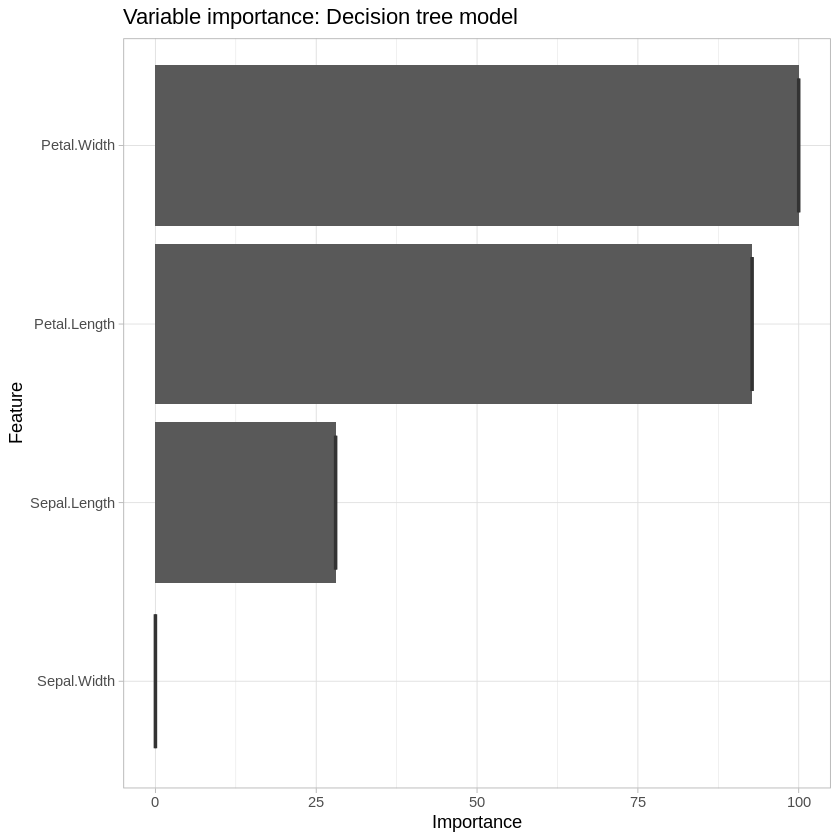

In [21]:
# Create object of importance of our variables 
dt_importance <- varImp(cart_model)

# Create plot of importance of variables
ggplot(data = dt_importance, mapping = aes(x = dt_importance[,1])) + # Data & mapping
  geom_boxplot() + # Create box plot
  labs(title = "Variable importance: Decision tree model") + # Title
  theme_light() # Theme

Quelles conclusions en tirez-vous ? 

### Prévision : utilisation du modèle sur le jeu de données test

In [22]:
prediction_cart <- predict(cart_model, test_data)

Déterminons la proportion de prévisions justes à l'aide de matrices de confusion :

In [23]:
confusionMatrix(prediction_cart, test_data$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         2
  virginica       0          0        13

Overall Statistics
                                          
               Accuracy : 0.9556          
                 95% CI : (0.8485, 0.9946)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9333          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.8667
Specificity                 1.0000            0.9333           1.0000
Pos Pred Value              1.0000            0.8824           1.0000
Neg Pred Value              1.0000            1.0000           0.9375
P

## c) Méthode du plus proche voisin 

### Entrainement 

Création du modèle de prévision à l'aide de la méthode du plus proche voisin (kNN).

In [24]:
knn_model <- train(Species~., data=train_data, method="knn", metric=metric, trControl=control)

Evaluons la précision de notre modèle à l'aide d'une matrice de confusion :

In [25]:
confusionMatrix(knn_model)

Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
            Reference
Prediction   setosa versicolor virginica
  setosa       33.3        0.0       0.0
  versicolor    0.0       31.4       2.9
  virginica     0.0        1.9      30.5
                            
 Accuracy (average) : 0.9524


On peut aussi regarder l'importance de chaque variable dans le choix de la classification de l'espèce d'iris.

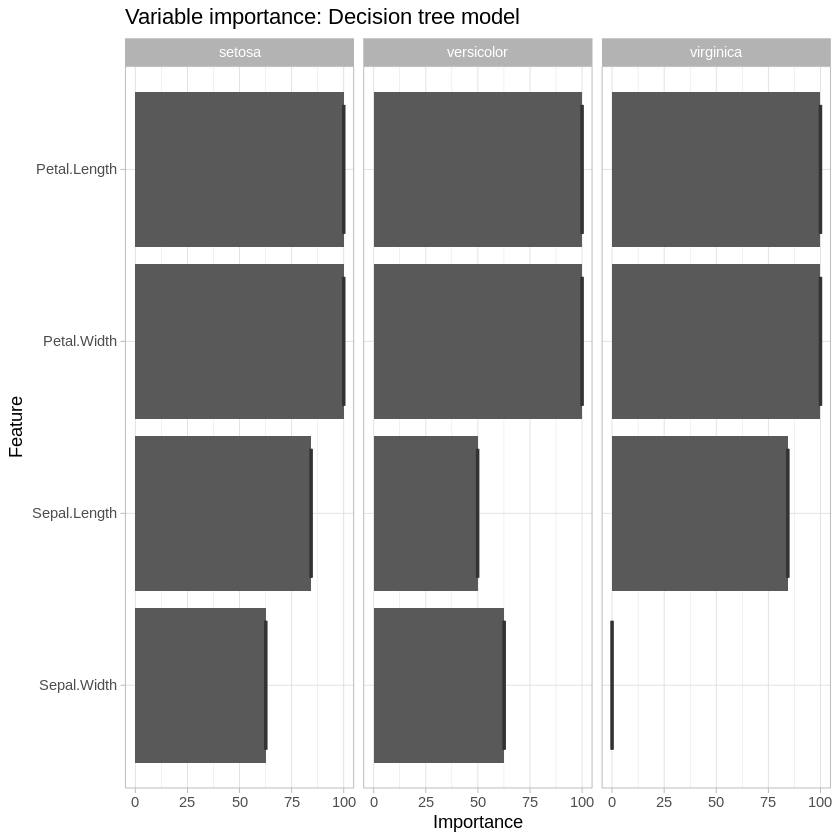

In [26]:
# Create object of importance of our variables 
dt_importance <- varImp(knn_model)

# Create plot of importance of variables
ggplot(data = dt_importance, mapping = aes(x = dt_importance[,1])) + # Data & mapping
  geom_boxplot() + # Create box plot
  labs(title = "Variable importance: Decision tree model") + # Title
  theme_light() # Theme

Quelles conclusions en tirez-vous ? 

### Prévision : utilisation du modèle sur le jeu de données test

In [27]:
prediction_knn <- predict(knn_model, test_data)

Déterminons la proportion de prévisions justes à l'aide de matrices de confusion :

In [28]:
confusionMatrix(prediction_cart, test_data$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         2
  virginica       0          0        13

Overall Statistics
                                          
               Accuracy : 0.9556          
                 95% CI : (0.8485, 0.9946)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9333          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.8667
Specificity                 1.0000            0.9333           1.0000
Pos Pred Value              1.0000            0.8824           1.0000
Neg Pred Value              1.0000            1.0000           0.9375
P

## d) Support Vector Machine

### Entrainement 

Création du modèle de prévision à l'aide du support vector machine. Sur R, cette méthode se nomme "svmRadial".

In [29]:
svm_model <- train(Species~., data=train_data, method="svmRadial", metric=metric, trControl=control)

Evaluons la précision de notre modèle à l'aide d'une matrice de confusion :

In [30]:
confusionMatrix(svm_model)

Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
            Reference
Prediction   setosa versicolor virginica
  setosa       33.3        0.0       0.0
  versicolor    0.0       30.5       1.9
  virginica     0.0        2.9      31.4
                            
 Accuracy (average) : 0.9524


On peut aussi regarder l'importance de chaque variable dans le choix de la classification de l'espèce d'iris.

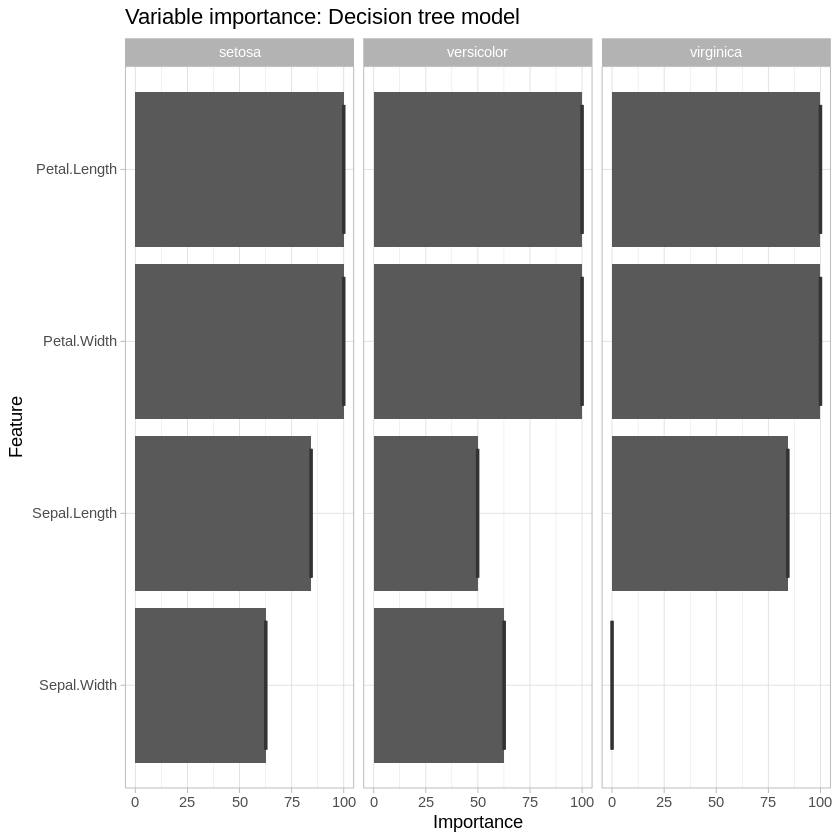

In [31]:
# Create object of importance of our variables 
dt_importance <- varImp(svm_model)

# Create plot of importance of variables
ggplot(data = dt_importance, mapping = aes(x = dt_importance[,1])) + # Data & mapping
  geom_boxplot() + # Create box plot
  labs(title = "Variable importance: Decision tree model") + # Title
  theme_light() # Theme

Quelles conclusions en tirez-vous ? 

### Prévision : utilisation du modèle sur le jeu de données test

In [32]:
prediction_svm <- predict(svm_model, test_data)

Déterminons la proportion de prévisions justes à l'aide de matrices de confusion :

In [33]:
confusionMatrix(prediction_svm, test_data$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         15         2
  virginica       1          0        13

Overall Statistics
                                         
               Accuracy : 0.9333         
                 95% CI : (0.8173, 0.986)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9            
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 0.9333            1.0000           0.8667
Specificity                 1.0000            0.9333           0.9667
Pos Pred Value              1.0000            0.8824           0.9286
Neg Pred Value              0.9677            1.0000           0.9355
Prevalence

# 3) Comparaison des modèles

Comparons les 4 modèles entre eux pour savoir celui qui est le plus précis. Listons tous les modèles au sein d'une même variable :

In [34]:
results <- resamples(list(lda=lda_model, cart=cart_model, knn=knn_model, svm=svm_model))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.7777778 0.9375000 1.0000000 0.9603535       1    1    0
cart 0.6666667 0.9022727 1.0000000 0.9309091       1    1    0
knn  0.8000000 0.9109848 1.0000000 0.9525758       1    1    0
svm  0.9000000 0.9022727 0.9583333 0.9525758       1    1    0

Kappa 
          Min.   1st Qu. Median      Mean 3rd Qu. Max. NA's
lda  0.6666667 0.9062500 1.0000 0.9402426       1    1    0
cart 0.5000000 0.8532496 1.0000 0.8961506       1    1    0
knn  0.6969697 0.8668981 1.0000 0.9284652       1    1    0
svm  0.8461538 0.8536847 0.9375 0.9282885       1    1    0


On peut représenter ces données à l'aide d'un graphique :

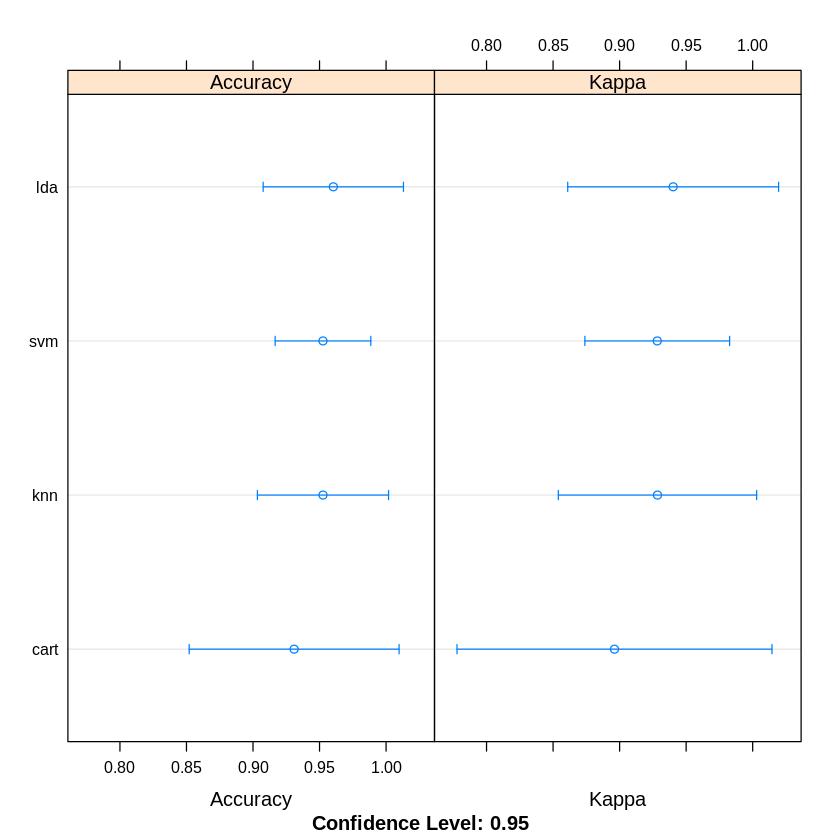

In [35]:
dotplot(results)

Quel est le modèle le plus précis ?